In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"USArrests.csv",index_col=0)

In [3]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
data.shape

(50, 4)

In [5]:
x=data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss =[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


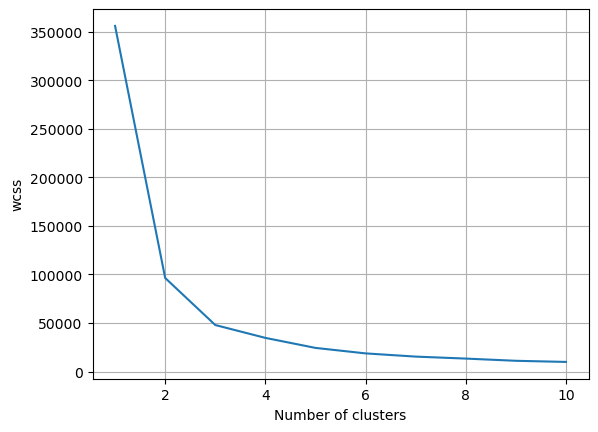

In [8]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [9]:
km=KMeans(n_clusters=3,n_init=10)

In [10]:
km.fit(x)

KMeans(n_clusters=3)

In [11]:
clusters_label=km.predict(x)

In [12]:
print(clusters_label)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


In [13]:
pd.Series(clusters_label).value_counts()

0    20
1    16
2    14
dtype: int64

Text(0.5, 0, 'Murder')

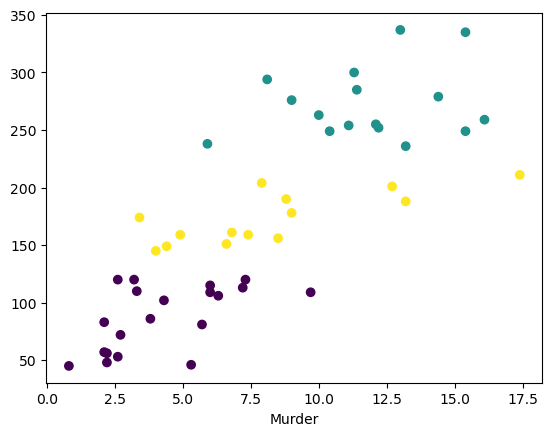

In [14]:
plt.scatter(x['Murder'],x['Assault'],c=clusters_label) 

plt.xlabel('Murder') 

Text(0.5, 0, 'Murder')

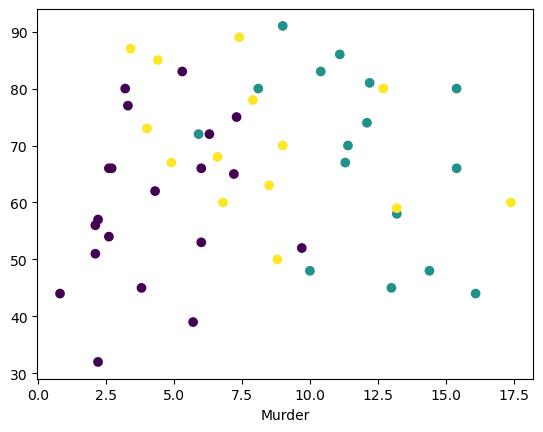

In [15]:
plt.scatter(x['Murder'],x['UrbanPop'],c=clusters_label) 

plt.xlabel('Murder')


In [16]:
cluster_indices=np.where(clusters_label==0)[0] 

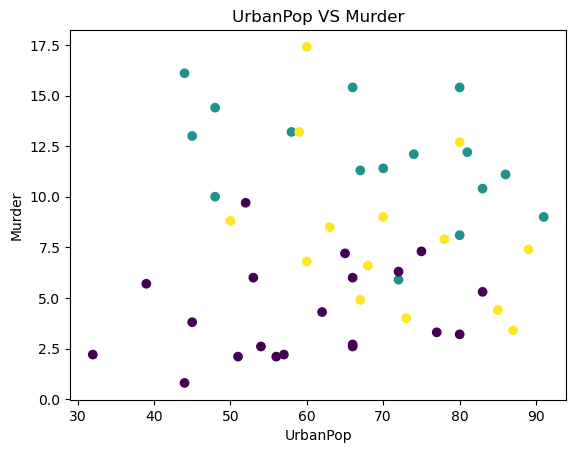

In [17]:
plt.scatter(x['UrbanPop'],x['Murder'],c=clusters_label) 

plt.xlabel('UrbanPop') 

plt.ylabel('Murder') 

plt.title('UrbanPop VS Murder') 

plt.show() 

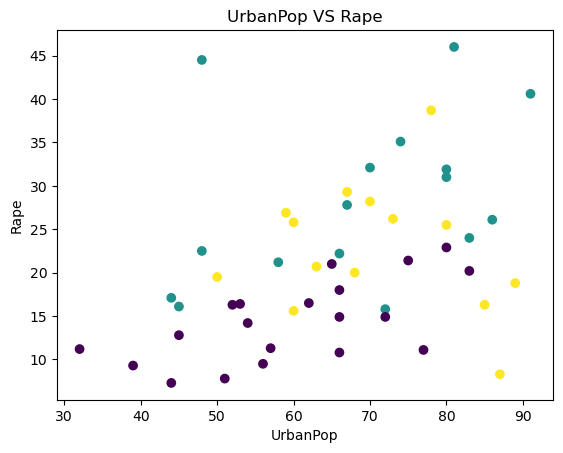

In [18]:
plt.scatter(x['UrbanPop'],x['Rape'],c=clusters_label) 

plt.xlabel('UrbanPop') 

plt.ylabel('Rape') 

plt.title('UrbanPop VS Rape') 

plt.show() 

In [19]:
data['Clusters_label']=clusters_label

In [20]:
data

,Murder,Assault,UrbanPop,Rape,Clusters_label
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,2


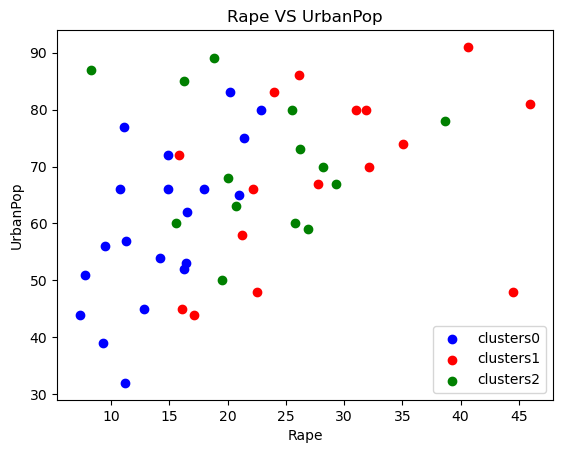

In [21]:
colors=['r','g','b'] 

for  i in range(0,max(clusters_label)+1): 
    clusters_data=x[clusters_label==i] 
    plt.scatter(clusters_data['Rape'], 
             clusters_data['UrbanPop'], 
             c=colors[i-1], 
             label=f'clusters{i}') 
plt.xlabel('Rape') 
plt.ylabel('UrbanPop') 
plt.title('Rape VS UrbanPop') 
plt.legend()

In [22]:
from sklearn.metrics import silhouette_score
silhouette_avg1=silhouette_score(x,clusters_label)
print(silhouette_avg1)

0.5319024108339817


In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [24]:

merging=linkage(x,method='ward')

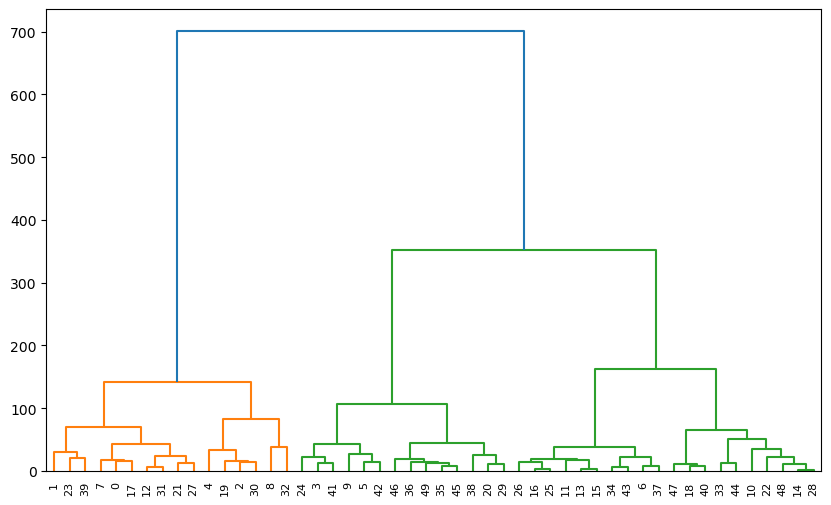

In [25]:
plt.figure(figsize=(10,6))
dendrogram(merging)
plt.show()

In [26]:
cluster_labels=fcluster(merging,450,criterion='distance')

In [27]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

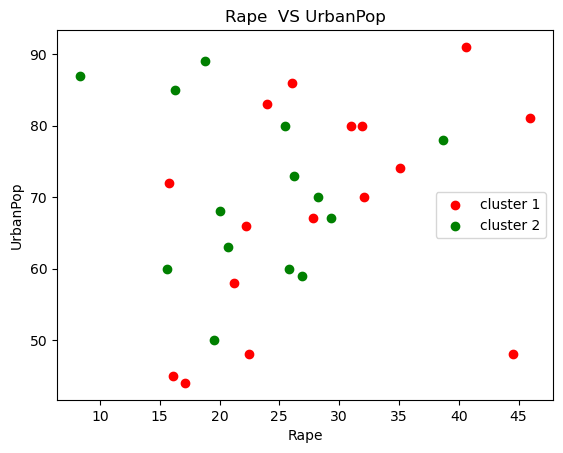

In [28]:
colors=['r','g'] 

for  i in range(1,max(clusters_label)+1): 
    clusters_data=x[clusters_label==i] 
    plt.scatter(clusters_data['Rape'], 
             clusters_data['UrbanPop'], 
             c=colors[i-1], 
             label=f'cluster {i}') 
plt.xlabel('Rape') 
plt.ylabel('UrbanPop') 
plt.title('Rape  VS UrbanPop') 
plt.legend()

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_avg1=silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.576270501827592
